In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px

In [22]:
avocado_mean = pd.read_csv('avocado_mean.csv')
avocado_mean.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [13]:
#Рассчитать скользящее среднее с окном 3, округлить и вывести максимальное

In [23]:
avocado_mean.AveragePrice.rolling(3, min_periods=1).mean().round(2).max()

1.85

In [14]:
#Построить графики скользящего среднего с различным шагом (window)

In [20]:
import matplotlib.dates as mdates

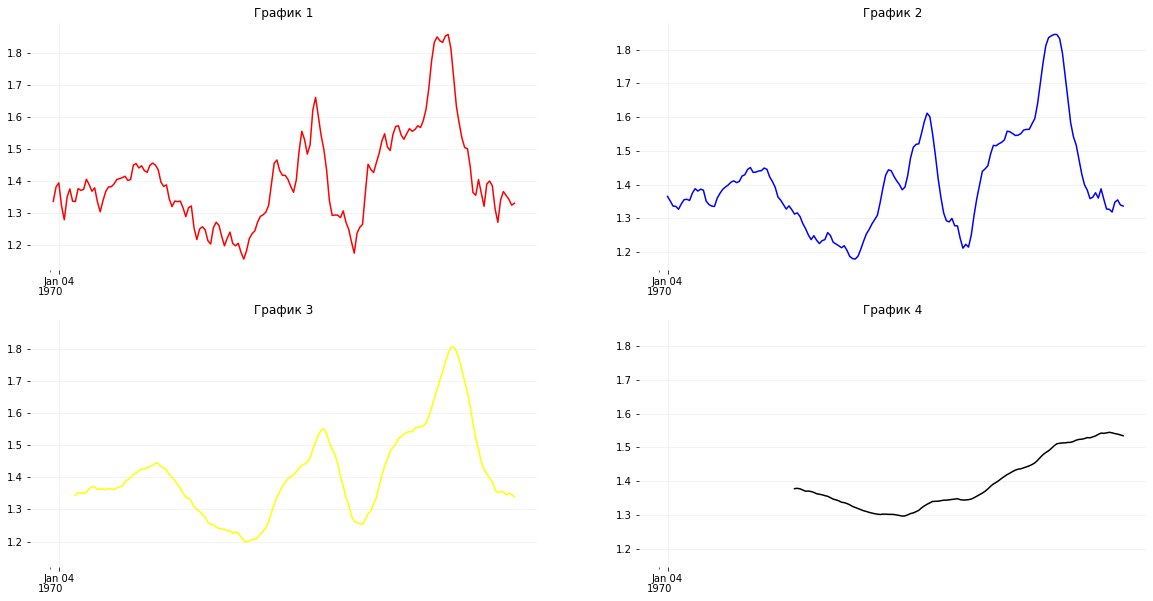

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)


windows = [2, 4, 10, 50]
colors = ['red', 'blue', 'yellow', 'black']

for window, ax, color in zip(windows, axes.flatten(), colors):
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)

for ax in axes.flatten():
    ax.set_frame_on(False)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    
    ax.grid(True, color='#e2e2e2', alpha=0.5)

for name, ax in zip(['1', '2', '3', '4'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    

plt.show()

In [53]:
ax.plot?

In [55]:
#Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2,
#чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [57]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [59]:
#И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 
#(использовать первую колонку как индекс).

#Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 
#и экспоненциальное скользящее среднее с параметром span=4. 
#Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [95]:
avocado_full = pd.read_csv('avocado_full.csv', parse_dates=True, index_col=0)

In [96]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [97]:
avocado_organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')

In [98]:
avocado_organic_chicago.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago


In [99]:
avocado_organic_chicago_mean = avocado_organic_chicago.rolling(4).mean()
avocado_organic_chicago_ewm = avocado_organic_chicago.ewm(span=4).mean()

In [100]:
avocado_organic_chicago_mean.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,1.7300,13522.5725,1120.635,11718.605,0.0,683.3325,683.3325,0.0,0.0,2015.0
2015-02-01,1.7375,12689.5425,1164.135,10770.405,0.0,755.0025,755.0025,0.0,0.0,2015.0


In [101]:
avocado_organic_chicago_ewm.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.490000,17723.170000,1189.350000,15628.270000,0.0,905.550000,905.550000,0.0,0.0,2015.0
2015-01-11,1.677500,14718.526250,1337.725000,12673.163750,0.0,707.637500,707.637500,0.0,0.0,2015.0
2015-01-18,1.745102,13586.558776,1244.401020,11733.085306,0.0,609.072449,609.072449,0.0,0.0,2015.0
2015-01-25,1.784118,12375.598860,999.561397,10713.946838,0.0,662.090625,662.090625,0.0,0.0,2015.0
2015-02-01,1.669563,13249.753588,1157.346183,11200.381242,0.0,892.026162,892.026162,0.0,0.0,2015.0


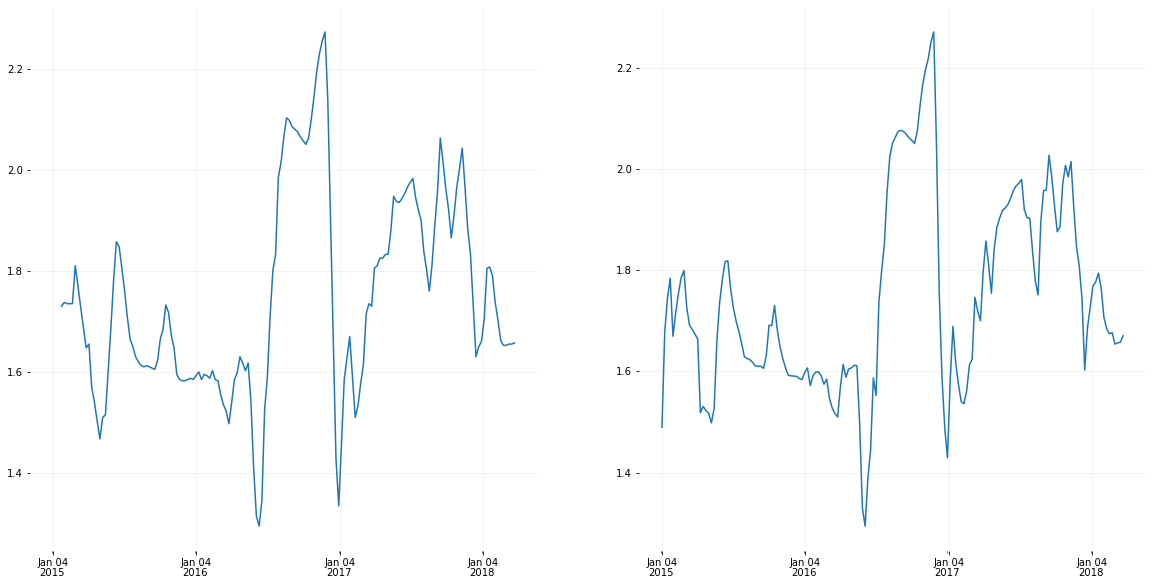

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
axes[0].plot(avocado_organic_chicago_mean.AveragePrice, label='Rolling mean')
axes[1].plot(avocado_organic_chicago_ewm.AveragePrice, label='EWM')
for ax in axes.flatten():
    ax.set_frame_on(False)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    
    ax.grid(True, color='#e2e2e2', alpha=0.5)

plt.show()

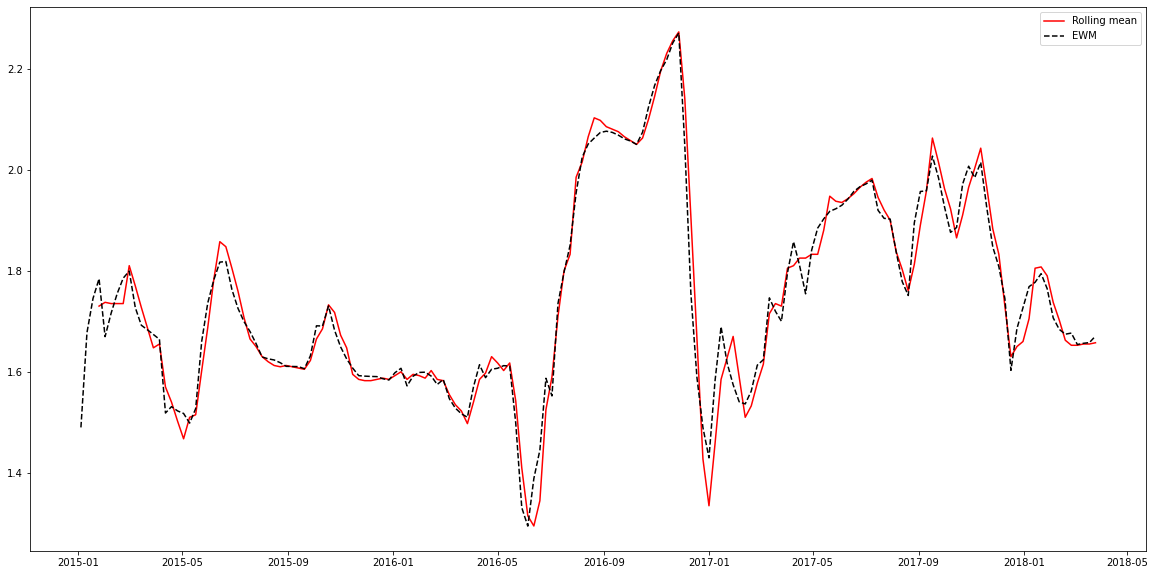

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(avocado_organic_chicago_mean.AveragePrice, '-r', label = 'Rolling mean')
ax.plot(avocado_organic_chicago_ewm.AveragePrice, '--k', label = 'EWM')
leg = ax.legend()

In [110]:
plt.plot?

In [145]:
avocado_organic_chicago_mean.AveragePrice['2017-02-19']

1.5325000000000002

In [146]:
#Запишите данные из файла в переменную df. Далее переведите delay в timedelta формат. 
#Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

In [147]:
df = pd.read_csv('delays.csv')

In [148]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [160]:
df.delay = df.delay.str.replace('-', '')
df.delay = pd.to_timedelta(df.delay)

In [161]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [162]:
#Время это хорошо, но хотелось бы также разделить его на промежутки. 
#Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [164]:
df['delay_categorical'] = pd.cut(df.delay, 3)

In [165]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


In [187]:
df['delay_categorical'] = pd.cut(df.delay, bins=pd.to_timedelta(['0d', '1d', '2d', '3d', '106751d']), labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [188]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


In [192]:
df_delays = df.groupby('delay_categorical', as_index=False) \
    .agg({'company_id':'count'}) \
    .rename(columns={'company_id':'count'})

In [193]:
df_delays.head()

,delay_categorical,count
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


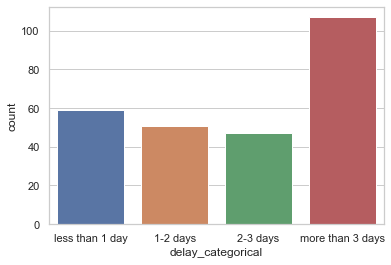

In [194]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="delay_categorical", y="count", data=df_delays)